# Paleogeography_Analysis

This Jupyter notebook (Python 2 kernel) uses pygplates to analyze the paleogeography of continents using various models.

A note on execution:
* post-emplacement LIP weathering/scaling requires zonal temperature and runoff values, which (in our model) depend on paleogeography
* thus, if the paleogeographic model is updated, execution order should be:
    * execute this notebook
    * execute Climate_Model.ipynb
    * execute this notebook again
    * execute the Seawater Model

In [1]:
import numpy as np
from numpy.core.umath_tests import inner1d
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline

import pygplates
import cartopy
import cartopy.crs as ccrs
from shapely.geometry.polygon import Polygon

from tqdm import tqdm_notebook

from netCDF4 import Dataset

/Users/yuempark/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  


## Functions

In [2]:
from Paleogeography_Analysis_Functions import lat_lon_2_cart
from Paleogeography_Analysis_Functions import cart_2_lat_lon
from Paleogeography_Analysis_Functions import fast_cross
from Paleogeography_Analysis_Functions import cross_and_normalize
from Paleogeography_Analysis_Functions import intersection
from Paleogeography_Analysis_Functions import plot_reconstruction
from Paleogeography_Analysis_Functions import check_polygon_in_band
from Paleogeography_Analysis_Functions import get_area_in_band
from Paleogeography_Analysis_Functions import plot_polygons
from Paleogeography_Analysis_Functions import get_areas_in_bands
from Paleogeography_Analysis_Functions import initialize_LIP_dict
from Paleogeography_Analysis_Functions import weather_LIPs
from Paleogeography_Analysis_Functions import get_LIP_areas_in_bands
from Paleogeography_Analysis_Functions import get_LIP_areas_in_bands2
from Paleogeography_Analysis_Functions import lat_from_pole

## .gpml Files

### Cratons For Working Group Model

In [3]:
craton_root = '../../Rodinia_Model/Reconstruction/Craton_Outlines/'
craton_gpmls = []

Laurentia_1000 = craton_root + '1000_Laurentia_Outline.gpml'
craton_gpmls.append(Laurentia_1000)
Amazonia_2201 = craton_root + '2201_Amazonia_Outline.gpml'
craton_gpmls.append(Amazonia_2201)
Sao_Francisco_2204 = craton_root + '2204_Sao_Francisco_Outline.gpml'
craton_gpmls.append(Sao_Francisco_2204)
Baltica_3000 = craton_root + '3000_Baltica_Outline.gpml'
craton_gpmls.append(Baltica_3000)
Siberia_4300 = craton_root + '4300_Siberia_Outline.gpml'
craton_gpmls.append(Siberia_4300)
India_5501 = craton_root + '5501_India_Outline.gpml'
craton_gpmls.append(India_5501)
North_China_6003 = craton_root + '6003_North_China_Outline.gpml'
craton_gpmls.append(North_China_6003)
Cathaysia_6601 = craton_root + '6601_Cathaysia_Outline.gpml'
craton_gpmls.append(Cathaysia_6601)
Yangtze_6603 = craton_root + '6603_Yangtze_Outline.gpml'
craton_gpmls.append(Yangtze_6603)
Congo_7701 = craton_root + '7701_Congo_Outline.gpml'
craton_gpmls.append(Congo_7701)
Kalahari_7702 = craton_root + '7702_Kalahari_Outline.gpml'
craton_gpmls.append(Kalahari_7702)
West_Africa_7703 = craton_root + '7703_West_Africa_Outline.gpml'
craton_gpmls.append(West_Africa_7703)
South_Australia_8001 = craton_root + '8001_South_Australia_Outline.gpml'
craton_gpmls.append(South_Australia_8001)
North_Australia_8004 = craton_root + '8004_North_Australia_Outline.gpml'
craton_gpmls.append(North_Australia_8004)
Mawson_8803 = craton_root + '8803_Mawson_Outline.gpml'
craton_gpmls.append(Mawson_8803)

craton_feature_collection = pygplates.FeatureCollection.read(craton_gpmls)

### Cratons For Li et al. (2008) Model

In [4]:
craton_root_Li = '../../Rodinia_Model/Reconstruction/Li2008_Rodinia_GPlates/Li2008_Craton_Outlines/'
craton_gpmls_Li = []

Parana_202 = craton_root_Li + '202_Parana_Outline.gpml'
craton_gpmls_Li.append(Parana_202)
Chortis_204 = craton_root_Li + '204_Chortis_Outline.gpml'
craton_gpmls_Li.append(Chortis_204)
Oaxacia_215 = craton_root_Li + '215_Oaxacia_Outline.gpml'
craton_gpmls_Li.append(Oaxacia_215)
Rockall_318 = craton_root_Li + '318_Rockall_Outline.gpml'
craton_gpmls_Li.append(Rockall_318)
Kara_417 = craton_root_Li + '417_Kara_Outline.gpml'
craton_gpmls_Li.append(Kara_417)
Laurentia_1000 = craton_root_Li + '1000_Laurentia_Outline.gpml'
craton_gpmls_Li.append(Laurentia_1000)
Arctic_Alaska_1104 = craton_root_Li + '1104_Arctic_Alaska_Outline.gpml'
craton_gpmls_Li.append(Arctic_Alaska_1104)
Amazonia_2201 = craton_root_Li + '2201_Amazonia_Outline.gpml'
craton_gpmls_Li.append(Amazonia_2201)
Sao_Francisco_2204 = craton_root_Li + '2204_Sao_Francisco_Outline.gpml'
craton_gpmls_Li.append(Sao_Francisco_2204)
Baltica_3000 = craton_root_Li + '3000_Baltica_Outline.gpml'
craton_gpmls_Li.append(Baltica_3000)
Svalbard_3301 = craton_root_Li + '3301_Svalbard_Outline.gpml'
craton_gpmls_Li.append(Svalbard_3301)
Siberia_4300 = craton_root_Li + '4300_Siberia_Outline.gpml'
craton_gpmls_Li.append(Siberia_4300)
India_5501 = craton_root_Li + '5501_India_Outline.gpml'
craton_gpmls_Li.append(India_5501)
North_China_6003 = craton_root_Li + '6003_North_China_Outline.gpml'
craton_gpmls_Li.append(North_China_6003)
Cathaysia_6601 = craton_root_Li + '6601_Cathaysia_Outline.gpml'
craton_gpmls_Li.append(Cathaysia_6601)
Yangtze_6603 = craton_root_Li + '6603_Yangtze_Outline.gpml'
craton_gpmls_Li.append(Yangtze_6603)
Tarim_6604 = craton_root_Li + '6604_Tarim_Outline.gpml'
craton_gpmls_Li.append(Tarim_6604)
Congo_7701 = craton_root_Li + '7701_Congo_Outline.gpml'
craton_gpmls_Li.append(Congo_7701)
Kalahari_7702 = craton_root_Li + '7702_Kalahari_Outline.gpml'
craton_gpmls_Li.append(Kalahari_7702)
West_Africa_7703 = craton_root_Li + '7703_West_Africa_Outline.gpml'
craton_gpmls_Li.append(West_Africa_7703)
South_Australia_8001 = craton_root_Li + '8001_South_Australia_Outline.gpml'
craton_gpmls_Li.append(South_Australia_8001)
North_Australia_8004 = craton_root_Li + '8004_North_Australia_Outline.gpml'
craton_gpmls_Li.append(North_Australia_8004)
Dronning_Maud_8802 = craton_root_Li + '8802_Dronning_Maud_Outline.gpml'
craton_gpmls_Li.append(Dronning_Maud_8802)
Mawson_8803 = craton_root_Li + '8803_Mawson_Outline.gpml'
craton_gpmls_Li.append(Mawson_8803)
Rayner_8804 = craton_root_Li + '8804_Rayner_Outline.gpml'
craton_gpmls_Li.append(Rayner_8804)

craton_feature_collection_Li = pygplates.FeatureCollection.read(craton_gpmls_Li)

### LIPs

Old oversimplified LIPs:

Ernst et al. (2017) 1300-700 Ma LIPs:

In [5]:
LIP_root = '../../Rodinia_Model/Reconstruction/LIP_Outlines/'

LIP_gpmls = [LIP_root + 'Ernst2017_LIPs_700.gpml']

LIP_feature_collection = pygplates.FeatureCollection.read(LIP_gpmls)

# the LIP fraction remaining dictionary
LIP_fracs = initialize_LIP_dict(LIP_feature_collection)

### Arc Accretion

In [6]:
AA_gpmls = ['Neopro_Arc_Accretion.gpml']

AA_feature_collection = pygplates.FeatureCollection.read(AA_gpmls)

## .rot Files

In [7]:
Rodinia_Model = '../../Rodinia_Model/Reconstruction/Rodinia_Model.rot'
Li_High_Lat_Model = '../../Rodinia_Model/Reconstruction/Li2008_Rodinia_GPlates/Li2008_Cratons_and_Rot/Li2008_high-lat.rot'
Li_Low_Lat_Model = '../../Rodinia_Model/Reconstruction/Li2008_Rodinia_GPlates/Li2008_Cratons_and_Rot/Li2008_low-lat.rot'

## Temperature and Runoff Files

### NCEP data

In [8]:
T_nc = Dataset('NCEP_data/tmp.0-10cm.mon.ltm.nc')
R_nc = Dataset('NCEP_data/runof.sfc.mon.ltm.nc')
P_nc = Dataset('NCEP_data/prate.sfc.mon.ltm.nc')

Yearly zonal mean:

In [9]:
T_zonal_means_nc = np.array([])
R_zonal_means_nc = np.array([])
P_zonal_means_nc = np.array([])
for i in range(len(T_nc.variables['lat'])):
    year_T = np.array([])
    year_R = np.array([])
    year_P = np.array([])
    for j in range(len(T_nc.variables['time'])):
        data_T = T_nc.variables['tmp'][j,i,:].data
        data_T = data_T[data_T>-100]
        data_R = R_nc.variables['runof'][j,i,:].data
        data_R = data_R[data_R>-100]
        data_P = P_nc.variables['prate'][j,i,:].data
        data_P = data_P[data_P>-100]
        year_T = np.append(year_T, data_T)
        year_R = np.append(year_R, data_R)
        year_P = np.append(year_P, data_P)
    T_zonal_means_nc = np.append(T_zonal_means_nc, np.nanmean(year_T))
    R_zonal_means_nc = np.append(R_zonal_means_nc, np.nanmean(year_R))
    P_zonal_means_nc = np.append(P_zonal_means_nc, np.nanmean(year_P))

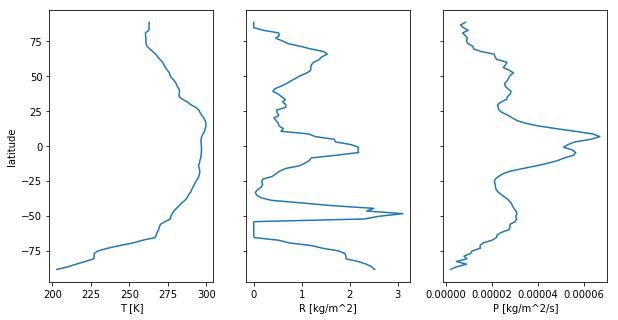

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(10,5))

ax[0].plot(T_zonal_means_nc,T_nc.variables['lat'])
ax[0].set_xlabel('T [K]')
ax[1].plot(R_zonal_means_nc,T_nc.variables['lat'])
ax[1].set_xlabel('R [kg/m^2]')
ax[2].plot(P_zonal_means_nc,T_nc.variables['lat'])
ax[2].set_xlabel('P [kg/m^2/s]')

ax[0].set_ylabel('latitude')

plt.show(fig)

Interpolate to 5 degree latitude resolution:

In [11]:
# create the latitude bands
# band_width must be a factor of 90
band_width = 10
lat_mins = np.arange(-90           , 90           , band_width)
lat_maxs = np.arange(-90+band_width, 90+band_width, band_width)
lat_mids = lat_mins + (lat_maxs-lat_mins)/2

In [12]:
T_zonal_means = np.interp(lat_mids, np.flipud(T_nc.variables['lat'][:].data), np.flipud(T_zonal_means_nc))
P_zonal_means = np.interp(lat_mids, np.flipud(T_nc.variables['lat'][:].data), np.flipud(P_zonal_means_nc))

Convert units to C and m/yr:

In [13]:
T_zonal_means = T_zonal_means - 273.15
P_zonal_means = P_zonal_means * 31536000 * 0.001

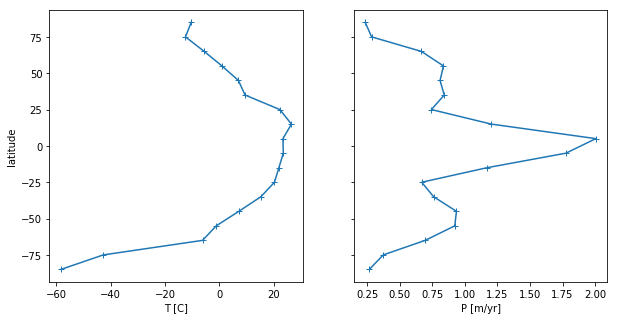

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(10,5))

ax[0].plot(T_zonal_means,lat_mids,'-+')
ax[0].set_xlabel('T [C]')
ax[1].plot(P_zonal_means,lat_mids,'-+')
ax[1].set_xlabel('P [m/yr]')

ax[0].set_ylabel('latitude')

plt.show(fig)

Convert format:

In [15]:
Ts = pd.read_csv('calculated_Ts.csv')
Rs = pd.read_csv('calculated_Rs.csv')

# reflect the Ts data
len_Ts = len(Ts.index)
for i in range(len_Ts):
    Ts.loc[len_Ts+i] = Ts.loc[i]
    Ts.loc[len_Ts+i, 'lat_maxs'] = -(Ts.loc[i, 'lat_maxs'])+10
    Ts.loc[len_Ts+i, 'lat_mids'] = -(Ts.loc[i, 'lat_mids'])
    Ts.loc[len_Ts+i, 'lat_mins'] = -(Ts.loc[i, 'lat_mins'])-10
Ts.sort_values('lat_mids',inplace=True)
Ts.reset_index(drop=True,inplace=True)

for i in range(3,len(Ts.columns)):
    Ts[Ts.columns[i]] = T_zonal_means
    
for i in range(3,len(Rs.columns)):
    Rs[Rs.columns[i]] = P_zonal_means

### my calculated version

Just uncomment this if you would rather use this than the NCEP data:

## Demonstration of the Method at 750 Ma

### The Reconstruction

In [16]:
# input parameters
t = 750     #reconstruction time
anchor = 0  #anchor plate ID

# carry out the reconstruction for the cratons
reconstructed_cratons = []
pygplates.reconstruct(craton_feature_collection, Rodinia_Model, reconstructed_cratons, t, anchor)

# carry out the reconstruction for the LIPs
reconstructed_LIPs = []
pygplates.reconstruct(LIP_feature_collection, Rodinia_Model, reconstructed_LIPs, t, anchor)

### Plot the Reconstruction

Note: haven't found fix for incorrect plotting of cratons that cross the E/W map boundaries.

/Users/yuempark/anaconda3/envs/py27/lib/python2.7/site-packages/cartopy/mpl/feature_artist.py:136: UserWarning: Unable to determine extent. Defaulting to global.
  warnings.warn('Unable to determine extent. Defaulting to global.')


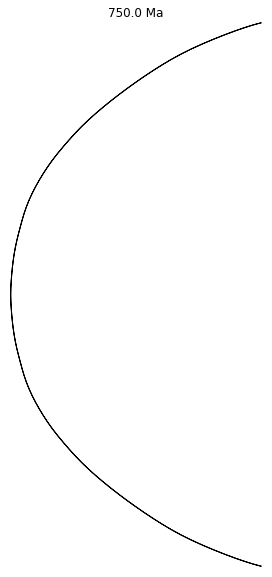

In [17]:
# just the cratons
fig = plot_reconstruction([reconstructed_cratons], ['C0'], lon_0=180)
plt.show(fig)

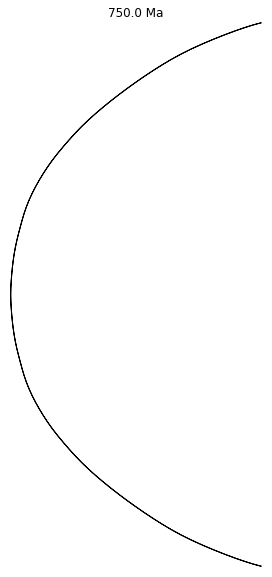

In [18]:
# cratons and LIPs
fig = plot_reconstruction([reconstructed_cratons, reconstructed_LIPs], ['C0','C1'], lon_0=180)
#plt.savefig('Save_Figures/750_reconstruction.svg')
plt.show(fig)

### Areas in Each Latitude Band

In [19]:
# create the latitude bands
band_width = 10
lat_mins = np.arange(-90           , 90           , band_width)
lat_maxs = np.arange(-90+band_width, 90+band_width, band_width)

# perform the calculations for cratons
areas_cratons, area_polygons_cratons = get_areas_in_bands(reconstructed_cratons, lat_mins, lat_maxs)

# perform the calculations for LIPs
# (for this demonstration at 750Ma we ignore weathering, since it can only be calculated iteratively)
areas_LIPs, area_polygons_LIPs = get_areas_in_bands(reconstructed_LIPs, lat_mins, lat_maxs)

### Plot the Area Polygons that were Pulled Out

If we reproduce the original reconstruction here, we have demonstrated that all parts of all landmasses have been accounted for in our calculations.

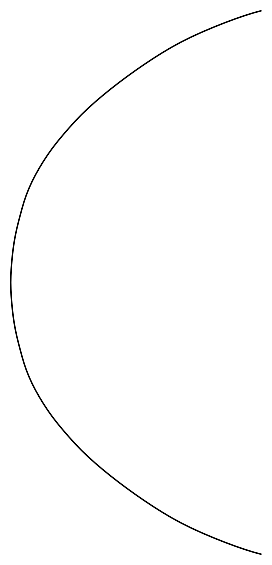

In [20]:
# cratons
fig, ax_map = plot_polygons(area_polygons_cratons, 'C0', lon_0=180)
plt.show(fig)

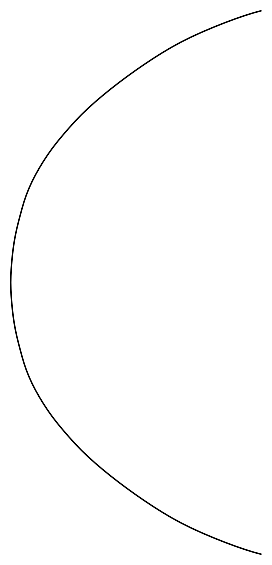

In [21]:
# LIPs
fig, ax_map = plot_polygons(area_polygons_LIPs, 'C1', lon_0=180)
plt.show(fig)

### Inspect the Calculated Areas

Note that for this demonstration at 750Ma we ignore weathering of LIPs, since it can only be calculated iteratively. Thus LIPs used here have persisted since time of emplacement.

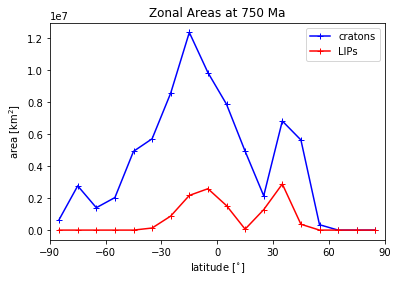

In [22]:
cols = ['area_km2','minimum_latitude','maximum_latitude']

df_cratons = pd.DataFrame({'minimum_latitude':lat_mins, 'maximum_latitude':lat_maxs, 'area_km2':areas_cratons})
df_cratons = df_cratons[cols]

df_LIPs = pd.DataFrame({'minimum_latitude':lat_mins, 'maximum_latitude':lat_maxs, 'area_km2':areas_LIPs})
df_LIPs = df_LIPs[cols]

fig, ax = plt.subplots()
ax.plot((df_cratons['minimum_latitude']+(df_cratons['maximum_latitude']-df_cratons['minimum_latitude'])/2), \
        df_cratons['area_km2'], 'b+-', label='cratons')
ax.plot((df_LIPs['minimum_latitude']+(df_LIPs['maximum_latitude']-df_LIPs['minimum_latitude'])/2), \
        df_LIPs['area_km2'], 'r+-', label='LIPs')
ax.set_xlabel('latitude [$^{\circ}$]')
ax.set_ylabel('area [km$^{2}$]')
ax.set_xlim(-90,90)
ax.set_xticks([-90,-60,-30,0,30,60,90])
ax.set_title('Zonal Areas at 750 Ma')
ax.legend()
plt.show(fig)

## Some Time Slices

### 1050 Ma

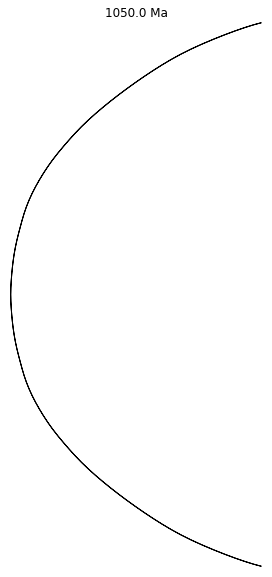

In [23]:
# input parameters
t = 1050     #reconstruction time
anchor = 0  #anchor plate ID

# carry out the reconstruction for the cratons
reconstructed_cratons = []
pygplates.reconstruct(craton_feature_collection, Rodinia_Model, reconstructed_cratons, t, anchor)

# carry out the reconstruction for the LIPs
reconstructed_LIPs = []
pygplates.reconstruct(LIP_feature_collection, Rodinia_Model, reconstructed_LIPs, t, anchor)

# just the cratons
fig = plot_reconstruction([reconstructed_cratons], ['C0'], lon_0=100)

#plt.savefig('Save_Figures/1050_reconstruction.svg')
plt.show(fig)

### 715 Ma - with Glacial Deposits

In [24]:
# input parameters
t = 715     #reconstruction time
anchor = 0  #anchor plate ID

# carry out the reconstruction for the cratons
reconstructed_cratons = []
pygplates.reconstruct(craton_feature_collection_Li, Li_High_Lat_Model, reconstructed_cratons, t, anchor)

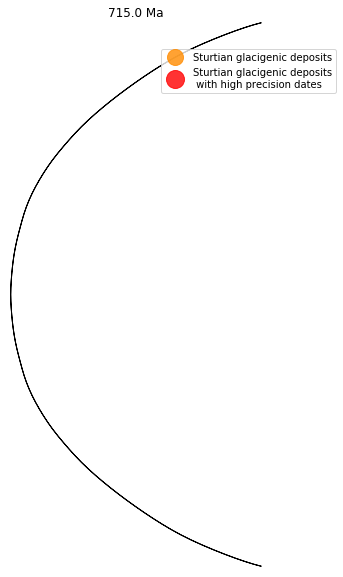

In [25]:
# initialize map
fig = plt.figure(figsize=(12,10))

ax_map = plt.subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180))
ax_map.gridlines(xlocs=np.arange(-180,181,60),ylocs=np.arange(-90,91,30),linestyle='--')
ax_map.set_title(str(reconstructed_cratons[0].get_reconstruction_time()) + ' Ma')

# loop over each reconstructed geometry
for i in range(len(reconstructed_cratons)):

    # pull out lat/lon vertices
    lat_lon_array = reconstructed_cratons[i].get_reconstructed_geometry().to_lat_lon_array()
    lats = lat_lon_array[:,0]
    lons = lat_lon_array[:,1]

    # wrapping to fix incorrect plotting across dateline
    for j in range(len(lons)):
        if lons[j]<0:
            lons[j] = 180 + 180 + lons[j]

    # zip the result
    poly = Polygon(zip(lons, lats))
    
    ax_map.add_geometries([poly], ccrs.PlateCarree(), facecolor='C0', edgecolor='k', alpha=0.5)
    
# add glacial deposits without dates (from Hoffman et Li, 2009)
lats = [33,  27,  13,   2, -40, -39, -33, -23, -25, -20,  -45,  -30,  -23,  -14, -20, -12,  -7,   2,   1,   2]
lons = [95, 111, 115, 120, 148, 126, 133, 143, 112, 120, -130, -155, -145, -137, 167, 148, 142, 165, 175, 185]

lats.extend([   12,   17,   22,   29, -26])
lons.extend([ -153, -139, -147, -142,  90])

ax_map.plot(lons, lats, 'o', c='darkorange', alpha=0.8, markersize=16,
            label='Sturtian glacigenic deposits', transform=ccrs.PlateCarree())

# add glacial deposits with dates
lats = [ 28,    4,    9, -18, -20]
lons = [152, -152, -161,  95,  87]

ax_map.plot(lons, lats, 'o', c='red', alpha=0.8, markersize=18,
            label='Sturtian glacigenic deposits\n with high precision dates', transform=ccrs.PlateCarree())

ax_map.legend(frameon=True, loc=(0.6,0.87))

#plt.savefig('../Manuscript/Figures/Sturtian_deposits.pdf')
plt.show(fig)

## Method at Multiple Reconstruction Times

### Refresh Switch

Computation time for pygplates reconstructions is relatively high. If we only to play with the data analysis, we can read in past Model calculations instead of re-calculating the Models.

In [26]:
# the refresh switch
refresh = True

In [27]:
# read in files if desired
if refresh:
    print 'Refresh is set to True. Calculations will be performed, and new data files will be created.'
else:
    calc_areas_cratons = pd.read_csv('calc_areas_cratons.csv')
    calc_areas_LIPs = pd.read_csv('calc_areas_LIPs.csv')
    calc_areas_LIPs_weath = pd.read_csv('calc_areas_LIPs_weath.csv')
    calc_areas_LIPs_thresh = pd.read_csv('calc_areas_LIPs_thresh.csv')
    calc_areas_LIPs_decay = pd.read_csv('calc_areas_LIPs_decay.csv')
    calc_areas_LIPs_cover = pd.read_csv('calc_areas_LIPs_cover.csv')
    calc_areas_cratons_Li_high = pd.read_csv('calc_areas_cratons_Li_high.csv')
    calc_areas_cratons_Li_low = pd.read_csv('calc_areas_cratons_Li_low.csv')
    LIP_emplacement = pd.read_csv('LIP_emplacement.csv')
    arc_accretion = pd.read_csv('arc_accretion.csv')
    LIP_frac_df = pd.read_csv('LIP_fracs.csv', index_col=0)
    more_cratons = pd.read_csv('cratons.csv')
    more_cratons_Li_high = pd.read_csv('cratons_Li_high.csv')
    more_cratons_Li_low = pd.read_csv('cratons_Li_low.csv')
    more_LIPs = pd.read_csv('LIPs.csv')
    print 'Refresh is set to False. Calculations will not be performed, and existing files will be read in.'

Refresh is set to True. Calculations will be performed, and new data files will be created.


### Constants Through All Models

In [28]:
# time resolution
t_step = -1

# some assumptions of LIP characteristics
#thickness = 1      #km
thickness = 4
density = 2.8e12   #kg/km^3
thresh = [50]
halflife = [100]
covered_LIP_names = ['Keweenawan']
cover_thresh = [1109-1085]

# create the latitude bands
# band_width must be a factor of 90
band_width = 10
lat_mins = np.arange(-90           , 90           , band_width)
lat_maxs = np.arange(-90+band_width, 90+band_width, band_width)
lat_mids = lat_mins + (lat_maxs-lat_mins)/2

### Working Group Model Calculations

In [29]:
# set up the time vector
t_start = 1270
t_stop = 0
ts = np.arange(t_start, t_stop+t_step, t_step)

if refresh:
    # initialize storage dataframes
    calc_areas_cratons = pd.DataFrame({'lat_mins':lat_mins, 'lat_maxs':lat_maxs, 'lat_mids':lat_mids})
    
    calc_areas_LIPs = pd.DataFrame({'lat_mins':lat_mins, 'lat_maxs':lat_maxs, 'lat_mids':lat_mids})
    calc_areas_LIPs_weath = pd.DataFrame({'lat_mins':lat_mins, 'lat_maxs':lat_maxs, 'lat_mids':lat_mids})
    calc_areas_LIPs_thresh = pd.DataFrame({'lat_mins':lat_mins, 'lat_maxs':lat_maxs, 'lat_mids':lat_mids})
    calc_areas_LIPs_decay = pd.DataFrame({'lat_mins':lat_mins, 'lat_maxs':lat_maxs, 'lat_mids':lat_mids})
    calc_areas_LIPs_cover = pd.DataFrame({'lat_mins':lat_mins, 'lat_maxs':lat_maxs, 'lat_mids':lat_mids})
    
    # used when weathering
    LIP_frac_df = pd.DataFrame(index=LIP_fracs.keys())

    # iterate through the time vector
    for i in tqdm_notebook(range(len(ts))):

        # carry out the reconstruction
        reconstructed_cratons = []
        pygplates.reconstruct(craton_gpmls, Rodinia_Model, reconstructed_cratons, ts[i], 0)
        reconstructed_LIPs = []
        pygplates.reconstruct(LIP_gpmls, Rodinia_Model, reconstructed_LIPs, ts[i], 0)

        # carry out LIP weathering
        weather_LIPs(reconstructed_LIPs, LIP_fracs, Ts, Rs, t_step, thickness, density)

        # perform the calculations
        areas_cratons, area_polygons_cratons = get_areas_in_bands(reconstructed_cratons, lat_mins, lat_maxs)

        areas_LIPs_weath, area_polygons_LIPs_weath = get_LIP_areas_in_bands(reconstructed_LIPs,
                                                                            lat_mins, lat_maxs,
                                                                            LIP_fracs)
        areas_LIPs,area_polygons_LIPs,areas_LIPs_thresh,areas_LIPs_decay,areas_LIPs_cover=\
            get_LIP_areas_in_bands2(reconstructed_LIPs,lat_mins,lat_maxs,
                                    thresh=thresh,halflife=halflife,cover_thresh=cover_thresh,
                                    covered_LIP_names=covered_LIP_names)

        # store results
        calc_areas_cratons['area_km2_' + str(ts[i])] = areas_cratons
        
        calc_areas_LIPs['area_km2_' + str(ts[i])] = areas_LIPs
        calc_areas_LIPs_weath['area_km2_' + str(ts[i])] = areas_LIPs_weath
        calc_areas_LIPs_thresh['area_km2_' + str(ts[i])] = areas_LIPs_thresh[0]
        calc_areas_LIPs_decay['area_km2_' + str(ts[i])] = areas_LIPs_decay[0]
        calc_areas_LIPs_cover['area_km2_' + str(ts[i])] = areas_LIPs_cover[0]
        
        for key, value in LIP_fracs.iteritems():
            LIP_frac_df.loc[key,'f_'+str(ts[i])] = value

Paleogeography_Analysis_Functions.py:429: RuntimeWarning: invalid value encountered in less
  mask = np.less(new_lats, lat_max+0.1)


#### LIP Emplacement Tracking

In [30]:
t_start_emplacement = 1270
t_stop_emplacement = 700
ts_emplacement = np.arange(t_start_emplacement, t_stop_emplacement+t_step, t_step)

if refresh:
    
    names = []
    emplacement_ages = []
    IDs = []
    for feature_collection in LIP_feature_collection:
        for feature in feature_collection:
            names.append(feature.get_name())
            emplacement_ages.append(feature.get_valid_time()[0])
            IDs.append(feature.get_feature_id())
                
    reconstructed_LIPs = []
    pygplates.reconstruct(LIP_gpmls, Rodinia_Model, reconstructed_LIPs, 0, 0)
    present_lats = []
    present_lons = []
    for j in range(len(reconstructed_LIPs)):
        ID = reconstructed_LIPs[j].get_feature().get_feature_id()
        present_lat, present_lon = reconstructed_LIPs[j].get_reconstructed_geometry().get_interior_centroid().to_lat_lon()
        present_lats.append(present_lat)
        present_lons.append(present_lon)
    
    LIP_emplacement = pd.DataFrame({'name':names,'emplacement_age':emplacement_ages,'present_lat':present_lats,'present_lon':present_lons},index=IDs)        
    
    # iterate through time steps
    for i in tqdm_notebook(range(len(ts_emplacement))):
        
        # reconstruct
        reconstructed_LIPs = []
        pygplates.reconstruct(LIP_gpmls, Rodinia_Model, reconstructed_LIPs, ts_emplacement[i], 0)
        
        # populate
        for j in range(len(reconstructed_LIPs)):
            
            # get area and lat at time of emplacement
            ID = reconstructed_LIPs[j].get_feature().get_feature_id()
            begin_age = reconstructed_LIPs[j].get_feature().get_valid_time()[0]
            if (begin_age<ts_emplacement[i]-t_step) and (begin_age>ts_emplacement[i]+t_step):
                area = reconstructed_LIPs[j].get_reconstructed_geometry().get_area() * 6371.009**2
                emplacement_lat = reconstructed_LIPs[j].get_reconstructed_geometry().get_interior_centroid().to_lat_lon()[0]
                LIP_emplacement.loc[ID, 'emplacement_area_km2'] = area
                LIP_emplacement.loc[ID, 'emplacement_lat'] = emplacement_lat
                
            # otherwise just track the lat
            centroid_lat = reconstructed_LIPs[j].get_reconstructed_geometry().get_interior_centroid().to_lat_lon()[0]    
            LIP_emplacement.loc[ID, 'lat_'+str(ts_emplacement[i])] = centroid_lat
    
    LIP_emplacement.sort_values(by='emplacement_age', inplace=True)
    LIP_emplacement.to_csv('LIP_emplacement.csv', index=True)

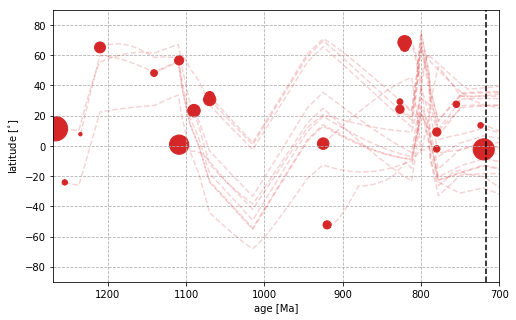

In [31]:
scatter_size = (LIP_emplacement['emplacement_area_km2']/np.max(LIP_emplacement['emplacement_area_km2']))*600

fig, ax = plt.subplots(figsize=(8,5))

ax.scatter(LIP_emplacement['emplacement_age'], LIP_emplacement['emplacement_lat'], s=scatter_size,c='#d62728')

for ID in LIP_emplacement.index:
    ax.plot(ts_emplacement[(len(ts_emplacement)-len(LIP_emplacement.loc[ID].values[6:])):],
            LIP_emplacement.loc[ID].values[6:], c='#d62728', alpha=0.2, ls='--')

ax.set_xlabel('age [Ma]')
ax.set_ylabel('latitude [$^{\circ}$]')
ax.set_ylim(-90,90)
ax.set_xlim(t_start_emplacement, t_stop_emplacement)
ax.axvline(717, c='k', ls='--')
ax.grid(ls='--')

plt.show(fig)

##### Check pygplates areas vs reported areas

Hard coded values come from Ernst et al. 2014:

In [32]:
def compare_areas(LIP_name, Ernst_area):
    n = len(LIP_emplacement[LIP_emplacement['name']==LIP_name].index)
    if n==1:
        pygp_area = LIP_emplacement[LIP_emplacement['name']==LIP_name]['emplacement_area_km2'][0]
        print(LIP_name + ': ' + str(Ernst_area) + ' vs ' + str(np.round(pygp_area)) + ' km2. Difference of ' +\
              str(np.round(pygp_area-Ernst_area)) + ' km2 or ' +\
              str(np.round(((pygp_area-Ernst_area)/Ernst_area)*100)) + '%')
    else:
        pygp_area = 0
        for i in range(n):
            pygp_area = pygp_area + LIP_emplacement[LIP_emplacement['name']==LIP_name]['emplacement_area_km2'][i]
        print(LIP_name + ' (' + str(n) + ' parts)' + ': ' +\
              str(Ernst_area) + ' vs ' + str(np.round(pygp_area)) + ' km2. Difference of ' +\
              str(np.round(pygp_area-Ernst_area)) + ' km2 or ' +\
              str(np.round(((pygp_area-Ernst_area)/Ernst_area)*100)) + '%')

In [33]:
compare_areas('Franklin', 2.25e6)
compare_areas('Irkutsk', 0.13e6) #referred to as Dovyren-Kingash in Ernst
compare_areas('Mundine Well', 0.18e6)
compare_areas('Gunbarrel', 0.49e6)
compare_areas('SWCUC', 1.34e6) #effectively Guibei in Ernst
compare_areas('Willouran-Gairdner', 0.63e6)
compare_areas('Gangil-Mayumbia', 0.34e6)
compare_areas('Dashigou', 0.65e6)
compare_areas('Warakurna', 1.55e6)
compare_areas('SW Laurentia', 1.13e6)
compare_areas('Keweenawan', 0.41e6)
compare_areas('Umkondo', 2.08e6)
compare_areas('Abitibi', 0.26e6)
compare_areas('Marnda Moorn', 0.59e6)
compare_areas('Sudbury', 0.12e6)
compare_areas('CSDG', 0.14e6)
compare_areas('Mackenzie', 2.7e6)

Franklin: 2250000.0 vs 2231191.0 km2. Difference of -18809.0 km2 or -1.0%
Irkutsk: 130000.0 vs 154369.0 km2. Difference of 24369.0 km2 or 19.0%
Mundine Well: 180000.0 vs 210235.0 km2. Difference of 30235.0 km2 or 17.0%
Gunbarrel (2 parts): 490000.0 vs 550249.0 km2. Difference of 60249.0 km2 or 12.0%
SWCUC (2 parts): 1340000.0 vs 1325131.0 km2. Difference of -14869.0 km2 or -1.0%
Willouran-Gairdner (2 parts): 630000.0 vs 516003.0 km2. Difference of -113997.0 km2 or -18.0%
Gangil-Mayumbia: 340000.0 vs 332643.0 km2. Difference of -7357.0 km2 or -2.0%
Dashigou: 650000.0 vs 662517.0 km2. Difference of 12517.0 km2 or 2.0%
Warakurna (2 parts): 1550000.0 vs 1200675.0 km2. Difference of -349325.0 km2 or -23.0%
SW Laurentia: 1130000.0 vs 775585.0 km2. Difference of -354415.0 km2 or -31.0%
Keweenawan: 410000.0 vs 414118.0 km2. Difference of 4118.0 km2 or 1.0%
Umkondo: 2080000.0 vs 1845935.0 km2. Difference of -234065.0 km2 or -11.0%
Abitibi: 260000.0 vs 229382.0 km2. Difference of -30618.0 km2 or

##### Check modeled paleolatitudes of LIPs vs paleomagnetic poles

Check that paleolatitudes here coming out of the model match paleomagnetic data coming from the LIPs themselves when those poles exist.

In [34]:
def compare_paleolats(LIP_name, pole):
    n = len(LIP_emplacement[LIP_emplacement['name']==LIP_name].index)
    if n==1:
        centroid_lon = LIP_emplacement[LIP_emplacement['name']==LIP_name]['present_lon'][0]
        centroid_lat = LIP_emplacement[LIP_emplacement['name']==LIP_name]['present_lat'][0]
        lat = lat_from_pole(centroid_lon,centroid_lat,pole[0],pole[1])
        print(LIP_name + ': ' + str(np.round(lat)) + ' ± ' + str(pole[2]) + ' vs ' +\
              str(np.round(LIP_emplacement[LIP_emplacement['name']==LIP_name]['emplacement_lat'][0])))
    else:
        for i in range(n):
            centroid_lon = LIP_emplacement[LIP_emplacement['name']==LIP_name]['present_lon'][i]
            centroid_lat = LIP_emplacement[LIP_emplacement['name']==LIP_name]['present_lat'][i]
            lat = lat_from_pole(centroid_lon,centroid_lat,pole[0],pole[1])
            print(LIP_name + ' (part ' + str(i+1) + ')' + ': ' + str(np.round(lat)) + ' ± ' + str(pole[2]) + ' vs ' +\
                  str(np.round(LIP_emplacement[LIP_emplacement['name']==LIP_name]['emplacement_lat'][i])))

In [35]:
compare_paleolats('CSDG',[159.1,-1.8,3.41])#MEAN post-Jotnian intrusions (see Leirubakki compilation for details)
compare_paleolats('Mackenzie',[190.0,4.0,5.0])#Mackenzie dykes grand mean (see Leirubakki compilation for details)
compare_paleolats('Sudbury',[192.8,-2.5,2.5])#Sudbury Dykes Combined (see Leirubakki compilation for details)
compare_paleolats('Marnda Moorn',[143.9,-55.8,6.3])#Gnowangerup-Fraser dykes (see Leirubakki compilation for details)
compare_paleolats('Abitibi',[215.5,48.8,14.1])#Abitibi Dykes (see Leirubakki compilation for details)
compare_paleolats('Keweenawan',[203.4,42.3,3.7])#Osler upper pole (see Swanson-Hysell et al. 2018 for details)
compare_paleolats('Umkondo',[222.1,-64.0,2.6])#Umkondo Grand mean (Swanson-Hysell et al., 2015)
compare_paleolats('SW Laurentia',[185.0,32.0,8])#Cardenas Basalts and Intrusions (see Leirubakki compilation for details)
compare_paleolats('Warakurna',[95.0,33.8,8.3])#Bangemall Sills (see Leirubakki compilation for details)
compare_paleolats('SWCUC',[91.0,13.5,10.9])#Xiaofeng Dykes (see Leirubakki compilation for details)
compare_paleolats('Gunbarrel',[137.8,1.6,5.0])#Tsezotene Sills Combined (see Leirubakki compilation for details)
compare_paleolats('Mundine Well',[135.4,45.3,4.1])#Mundine Well Dykes Combined (see Leirubakki compilation for details)
compare_paleolats('Franklin',[162.1,6.7,3.0])#Franklin event grand mean (see Leirubakki compilation for details)

CSDG: -23.0 ± 3.41 vs -24.0
Mackenzie: 12.0 ± 5.0 vs 11.0
Sudbury: 1.0 ± 2.5 vs 8.0
Marnda Moorn: 60.0 ± 6.3 vs 65.0
Abitibi: 49.0 ± 14.1 vs 48.0
Keweenawan: 43.0 ± 3.7 vs 57.0
Umkondo: -2.0 ± 2.6 vs 1.0
SW Laurentia: 34.0 ± 8 vs 23.0
Warakurna (part 1): 25.0 ± 8.3 vs 31.0
Warakurna (part 2): 22.0 ± 8.3 vs 33.0
SWCUC (part 1): 69.0 ± 10.9 vs 69.0
SWCUC (part 2): 65.0 ± 10.9 vs 66.0
Gunbarrel (part 1): -13.0 ± 5.0 vs -2.0
Gunbarrel (part 2): -4.0 ± 5.0 vs 9.0
Mundine Well: 19.0 ± 4.1 vs 28.0
Franklin: -2.0 ± 3.0 vs -2.0


#### Arc Accretion Tracking

In [36]:
if refresh:
    
    names = []
    IDs = []
    for feature_collection in AA_feature_collection:
        for feature in feature_collection:
            names.append(feature.get_name())
            IDs.append(feature.get_feature_id())
                
    reconstructed_AAs = []
    pygplates.reconstruct(AA_gpmls, Rodinia_Model, reconstructed_AAs, 0, 0)
    present_lats = []
    present_lons = []
    for j in range(len(reconstructed_AAs)):
        present_lat, present_lon = reconstructed_AAs[j].get_reconstructed_geometry().get_interior_centroid().to_lat_lon()
        present_lats.append(present_lat)
        present_lons.append(present_lon)
    
    arc_accretion = pd.DataFrame({'name':names,'present_lat':present_lats,'present_lon':present_lons},index=IDs)        
    
    # iterate through time steps
    for i in tqdm_notebook(range(len(ts_emplacement))):
        
        # reconstruct
        reconstructed_AAs = []
        pygplates.reconstruct(AA_gpmls, Rodinia_Model, reconstructed_AAs, ts_emplacement[i], 0)
        
        # populate
        for j in range(len(reconstructed_AAs)):
            
            # track the lat
            ID = reconstructed_AAs[j].get_feature().get_feature_id()
                
            centroid_lat = reconstructed_AAs[j].get_reconstructed_geometry().get_interior_centroid().to_lat_lon()[0]    
            arc_accretion.loc[ID, 'lat_'+str(ts_emplacement[i])] = centroid_lat
    
    arc_accretion.to_csv('arc_accretion.csv', index=True)

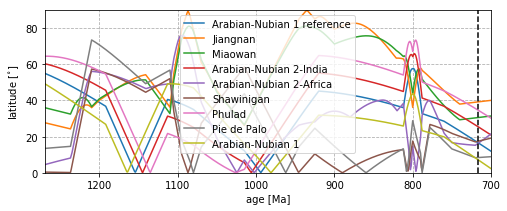

In [37]:
fig, ax = plt.subplots(figsize=(8,3))

for ID in arc_accretion.index:
    ax.plot(ts_emplacement[(len(ts_emplacement)-len(arc_accretion.loc[ID].values[3:])):],
            np.abs(arc_accretion.loc[ID].values[3:]), label=arc_accretion.loc[ID,'name'])

ax.set_xlabel('age [Ma]')
ax.set_ylabel('latitude [$^{\circ}$]')
ax.set_ylim(0,90)
ax.set_xlim(t_start_emplacement, t_stop_emplacement)
ax.legend()
ax.axvline(717, c='k', ls='--')
ax.grid(ls='--')

plt.show(fig)

### Li et al. (2008) Model Calculations

We are not making LIP calculations for now.

In [38]:
# set up the time vector
t_start_Li = 1100
t_stop_Li = 530
ts_Li = np.arange(t_start_Li, t_stop_Li+t_step, t_step)

#### High Latitude Model

In [39]:
if refresh:
    # initialize storage dataframes
    calc_areas_cratons_Li_high = pd.DataFrame({'lat_mins':lat_mins, 'lat_maxs':lat_maxs, 'lat_mids':lat_mids})

    # iterate through the time vector
    for i in tqdm_notebook(range(len(ts_Li))):

        # carry out the reconstruction
        reconstructed_cratons = []
        pygplates.reconstruct(craton_gpmls_Li, Li_High_Lat_Model, reconstructed_cratons, ts_Li[i], 0)

        # perform the calculations
        areas_cratons, area_polygons_cratons = get_areas_in_bands(reconstructed_cratons, lat_mins, lat_maxs)

        # store results
        calc_areas_cratons_Li_high['area_km2_' + str(ts_Li[i])] = areas_cratons

#### Low Latitude Model

In [40]:
if refresh:
    # initialize storage dataframes
    calc_areas_cratons_Li_low = pd.DataFrame({'lat_mins':lat_mins, 'lat_maxs':lat_maxs, 'lat_mids':lat_mids})

    # iterate through the time vector
    for i in tqdm_notebook(range(len(ts_Li))):

        # carry out the reconstruction
        reconstructed_cratons = []
        pygplates.reconstruct(craton_gpmls_Li, Li_Low_Lat_Model, reconstructed_cratons, ts_Li[i], 0)

        # perform the calculations
        areas_cratons, area_polygons_cratons = get_areas_in_bands(reconstructed_cratons, lat_mins, lat_maxs)

        # store results
        calc_areas_cratons_Li_low['area_km2_' + str(ts_Li[i])] = areas_cratons

### The Total Craton Area at Each Time Step

If this notebook is executed from start to finish, this plot will show:

* pre-scaling total craton area when `refresh = True`

* post-scaling total craton area when `refresh = False`

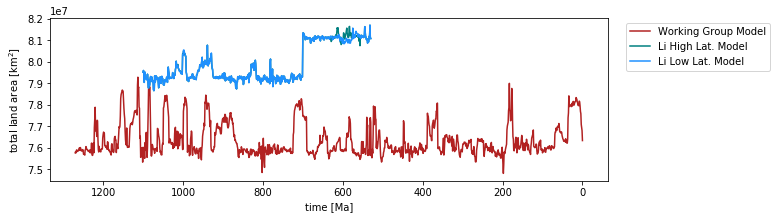

In [41]:
# calculate the total area at each time step - Working Group Model
total_area = []
for i in range(len(ts)):
    area = sum(calc_areas_cratons['area_km2_' + str(ts[i])])
    total_area.append(area)

# calculate the total area at each time step - Li Models
total_area_Li_high = []
total_area_Li_low = []
for i in range(len(ts_Li)):
    area = sum(calc_areas_cratons_Li_high['area_km2_' + str(ts_Li[i])])
    total_area_Li_high.append(area)
    area = sum(calc_areas_cratons_Li_low['area_km2_' + str(ts_Li[i])])
    total_area_Li_low.append(area)

# plot
fig, ax = plt.subplots(figsize=(10,3))
ax.plot(ts, total_area, c='firebrick', label='Working Group Model')
ax.plot(ts_Li, total_area_Li_high, c='teal', label='Li High Lat. Model')
ax.plot(ts_Li, total_area_Li_low, c='dodgerblue', label='Li Low Lat. Model')
ax.set_ylabel('total land area [km$^{2}$]')
ax.set_xlabel('time [Ma]')
ax.legend(bbox_to_anchor=(1.3, 1))
ax.invert_xaxis()
plt.show(fig)

### Scale the Craton Areas

To account for land missing from the GPlates model.

The `true_craton_area` value comes from Hawkesworth et al. (2006).

In [42]:
if refresh:
    # the true craton area
    true_craton_area = 1.2e8

    # scale - Working Group Model
    for i in range(len(ts)):
        all_land = calc_areas_cratons['area_km2_' + str(ts[i])]
        craton_scale = true_craton_area / sum(all_land)
        for j in range(len(calc_areas_cratons.index)):
            calc_areas_cratons.loc[j,'area_km2_'+str(ts[i])] = \
            calc_areas_cratons['area_km2_'+str(ts[i])][j] * craton_scale

    # scale - Li Models
    for i in range(len(ts_Li)):
        all_land = calc_areas_cratons_Li_high['area_km2_' + str(ts_Li[i])]
        craton_scale = true_craton_area / sum(all_land)
        for j in range(len(calc_areas_cratons_Li_high.index)):
            calc_areas_cratons_Li_high.loc[j,'area_km2_'+str(ts_Li[i])] = \
            calc_areas_cratons_Li_high['area_km2_'+str(ts_Li[i])][j] * craton_scale

        all_land = calc_areas_cratons_Li_low['area_km2_' + str(ts_Li[i])]
        craton_scale = true_craton_area / sum(all_land)
        for j in range(len(calc_areas_cratons_Li_low.index)):
            calc_areas_cratons_Li_low.loc[j,'area_km2_'+str(ts_Li[i])] = \
            calc_areas_cratons_Li_low['area_km2_'+str(ts_Li[i])][j] * craton_scale

    # save all results to a .csv
    calc_areas_cratons.to_csv('calc_areas_cratons.csv', index=False)
    calc_areas_LIPs.to_csv('calc_areas_LIPs.csv', index=False)
    calc_areas_LIPs_weath.to_csv('calc_areas_LIPs_weath.csv', index=False)
    calc_areas_LIPs_thresh.to_csv('calc_areas_LIPs_thresh.csv', index=False)
    calc_areas_LIPs_decay.to_csv('calc_areas_LIPs_decay.csv', index=False)
    calc_areas_LIPs_cover.to_csv('calc_areas_LIPs_cover.csv', index=False)
    calc_areas_cratons_Li_high.to_csv('calc_areas_cratons_Li_high.csv', index=False)
    calc_areas_cratons_Li_low.to_csv('calc_areas_cratons_Li_low.csv', index=False)
    LIP_frac_df.to_csv('LIP_fracs.csv')

### Linear Interpolation Between Model Timesteps

We linearly interpolate here because actually calculating the values at such a high resolution will be too computationally expensive.

In [43]:
if refresh:
    # seawater model time range and step
    dt = 0.1
    model_t = np.arange(1270,699,-1)

    # the cratons - Working Group Model
    more_cratons = pd.DataFrame({'lat_maxs':calc_areas_cratons['lat_maxs'],\
                                 'lat_mids':calc_areas_cratons['lat_mids'],\
                                 'lat_mins':calc_areas_cratons['lat_mins']})
    for i in range(len(model_t)-1):
        more_cratons['area_km2_'+str(float(model_t[i]))] = calc_areas_cratons['area_km2_'+str(int(model_t[i]))]
        for j in range(len(calc_areas_cratons.index)):
            temp_row = np.linspace(calc_areas_cratons['area_km2_'+str(int(model_t[i]))][j],\
                                   calc_areas_cratons['area_km2_'+str(int(model_t[i+1]))][j], 11)
            for k in range(len(temp_row)-2):
                more_cratons.loc[j,'area_km2_'+str(model_t[i]-dt*k-dt)] = temp_row[k+1]
    more_cratons['area_km2_'+str(float(700))] = calc_areas_cratons['area_km2_'+str(int(700))]
    more_cratons.to_csv('cratons.csv', index=False)

    # seawater model time range for Li Model
    model_t_Li = np.arange(1100,699,-1)
    
    # the cratons - Li High Lat. Model
    more_cratons_Li_high = pd.DataFrame({'lat_maxs':calc_areas_cratons_Li_high['lat_maxs'],\
                                         'lat_mids':calc_areas_cratons_Li_high['lat_mids'],\
                                         'lat_mins':calc_areas_cratons_Li_high['lat_mins']})
    for i in range(len(model_t_Li)-1):
        more_cratons_Li_high['area_km2_'+str(float(model_t_Li[i]))] =\
        calc_areas_cratons_Li_high['area_km2_'+str(int(model_t_Li[i]))]
        for j in range(len(calc_areas_cratons_Li_high.index)):
            temp_row = np.linspace(calc_areas_cratons_Li_high['area_km2_'+str(int(model_t_Li[i]))][j],\
                                   calc_areas_cratons_Li_high['area_km2_'+str(int(model_t_Li[i+1]))][j], 11)
            for k in range(len(temp_row)-2):
                more_cratons_Li_high.loc[j,'area_km2_'+str(model_t_Li[i]-dt*k-dt)] = temp_row[k+1]
    more_cratons_Li_high['area_km2_'+str(float(700))] = calc_areas_cratons_Li_high['area_km2_'+str(int(700))]
    more_cratons_Li_high.to_csv('cratons_Li_high.csv', index=False)

    # the cratons - Li Low Lat. Model
    more_cratons_Li_low = pd.DataFrame({'lat_maxs':calc_areas_cratons_Li_low['lat_maxs'],\
                                        'lat_mids':calc_areas_cratons_Li_low['lat_mids'],\
                                        'lat_mins':calc_areas_cratons_Li_low['lat_mins']})
    for i in range(len(model_t_Li)-1):
        more_cratons_Li_low['area_km2_'+str(float(model_t_Li[i]))] =\
        calc_areas_cratons_Li_low['area_km2_'+str(int(model_t_Li[i]))]
        for j in range(len(calc_areas_cratons_Li_low.index)):
            temp_row = np.linspace(calc_areas_cratons_Li_low['area_km2_'+str(int(model_t_Li[i]))][j],\
                                   calc_areas_cratons_Li_low['area_km2_'+str(int(model_t_Li[i+1]))][j], 11)
            for k in range(len(temp_row)-2):
                more_cratons_Li_low.loc[j,'area_km2_'+str(model_t_Li[i]-dt*k-dt)] = temp_row[k+1]
    more_cratons_Li_low['area_km2_'+str(float(700))] = calc_areas_cratons_Li_low['area_km2_'+str(int(700))]
    more_cratons_Li_low.to_csv('cratons_Li_low.csv', index=False)

    # the LIPs
    more_LIPs = pd.DataFrame({'lat_maxs':calc_areas_LIPs['lat_maxs'],\
                              'lat_mids':calc_areas_LIPs['lat_mids'],\
                              'lat_mins':calc_areas_LIPs['lat_mins']})
    for i in range(len(model_t)-1):
        more_LIPs['area_km2_'+str(float(model_t[i]))] = calc_areas_LIPs['area_km2_'+str(int(model_t[i]))]
        for j in range(len(calc_areas_LIPs.index)):
            temp_row = np.linspace(calc_areas_LIPs['area_km2_'+str(int(model_t[i]))][j],\
                                   calc_areas_LIPs['area_km2_'+str(int(model_t[i+1]))][j], 11)
            for k in range(len(temp_row)-2):
                more_LIPs.loc[j,'area_km2_'+str(model_t[i]-dt*k-dt)] = temp_row[k+1]
    more_LIPs['area_km2_'+str(float(700))] = calc_areas_LIPs['area_km2_'+str(int(700))]
    more_LIPs.to_csv('LIPs.csv', index=False)

## Analysis of Results

### Plot the LIP Weathering

Individual LIPs

Static version:

Total LIPs

### The Zonal Craton and LIP Distribution Through Time

/Users/yuempark/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Users/yuempark/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:27: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Users/yuempark/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:48: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Users/yuempark/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:69: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


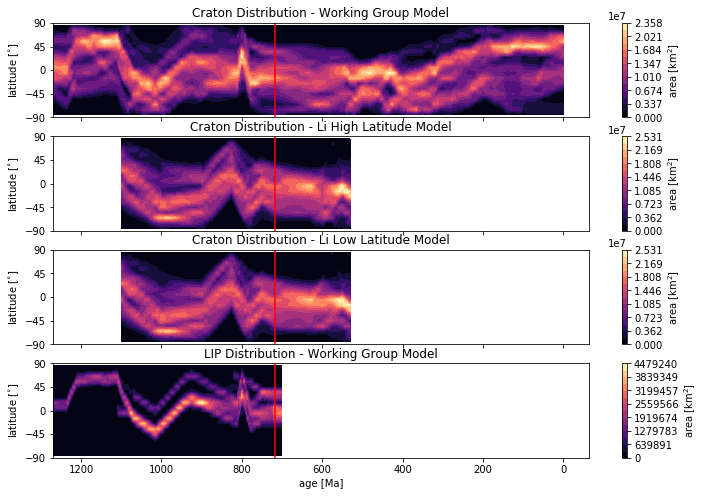

In [44]:
fig, axs = plt.subplots(4, 1, figsize=(12,8), sharex=True)

##### cratons - Working Group Model

# pull out just the values for plotting (i.e. no index or column headings)
just_values = calc_areas_cratons.as_matrix(columns=calc_areas_cratons.columns[3:])

# the number of levels
levels = np.linspace(np.min(just_values),np.max(just_values),15)

# plot
cntrf = axs[0].contourf(ts, calc_areas_cratons['lat_mids'], just_values, cmap='magma', levels=levels)

# prettify
axs[0].set_ylabel('latitude [$^{\circ}$]')
axs[0].set_title('Craton Distribution - Working Group Model')
axs[0].set_yticks([-90,-45,0,45,90])
axs[0].axvline(717,color='r')

# the colorbar
cbar = fig.colorbar(cntrf, ax=axs[0])
cbar.ax.set_ylabel('area [km$^{2}$]')

##### cratons - Li High Lat. Model

# pull out just the values for plotting (i.e. no index or column headings)
just_values = calc_areas_cratons_Li_high.as_matrix(columns=calc_areas_cratons_Li_high.columns[3:])

# the number of levels
levels = np.linspace(np.min(just_values),np.max(just_values),15)

# plot
cntrf = axs[1].contourf(ts_Li, calc_areas_cratons_Li_high['lat_mids'], just_values, cmap='magma', levels=levels)

# prettify
axs[1].set_ylabel('latitude [$^{\circ}$]')
axs[1].set_title('Craton Distribution - Li High Latitude Model')
axs[1].set_yticks([-90,-45,0,45,90])
axs[1].axvline(717,color='r')

# the colorbar
cbar = fig.colorbar(cntrf, ax=axs[1])
cbar.ax.set_ylabel('area [km$^{2}$]')

##### cratons - Li Low Lat. Model

# pull out just the values for plotting (i.e. no index or column headings)
just_values = calc_areas_cratons_Li_low.as_matrix(columns=calc_areas_cratons_Li_low.columns[3:])

# the number of levels
levels = np.linspace(np.min(just_values),np.max(just_values),15)

# plot
cntrf = axs[2].contourf(ts_Li, calc_areas_cratons_Li_low['lat_mids'], just_values, cmap='magma', levels=levels)

# prettify
axs[2].set_ylabel('latitude [$^{\circ}$]')
axs[2].set_title('Craton Distribution - Li Low Latitude Model')
axs[2].set_yticks([-90,-45,0,45,90])
axs[2].axvline(717,color='r')

# the colorbar
cbar = fig.colorbar(cntrf, ax=axs[2])
cbar.ax.set_ylabel('area [km$^{2}$]')

##### LIPs

# pull out just the values for plotting (i.e. no index or column headings)
just_values = calc_areas_LIPs.as_matrix(columns=calc_areas_LIPs.columns[3:Ts.shape[1]])

# the number of levels
levels = np.linspace(np.min(just_values),np.max(just_values),15)

# plot
cntrf = axs[3].contourf(ts[:(Ts.shape[1]-3)], calc_areas_LIPs['lat_mids'],\
                        just_values, cmap='magma', levels=levels)

# prettify
axs[3].set_ylabel('latitude [$^{\circ}$]')
axs[3].set_title('LIP Distribution - Working Group Model')
axs[3].set_yticks([-90,-45,0,45,90])
axs[3].axvline(717,color='r')
axs[3].set_xlabel('age [Ma]')
axs[3].invert_xaxis()

# the colorbar
cbar = fig.colorbar(cntrf, ax=axs[3])
cbar.ax.set_ylabel('area [km$^{2}$]')

plt.show(fig)

900-700 Ma version:

/Users/yuempark/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Users/yuempark/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:27: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Users/yuempark/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:48: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


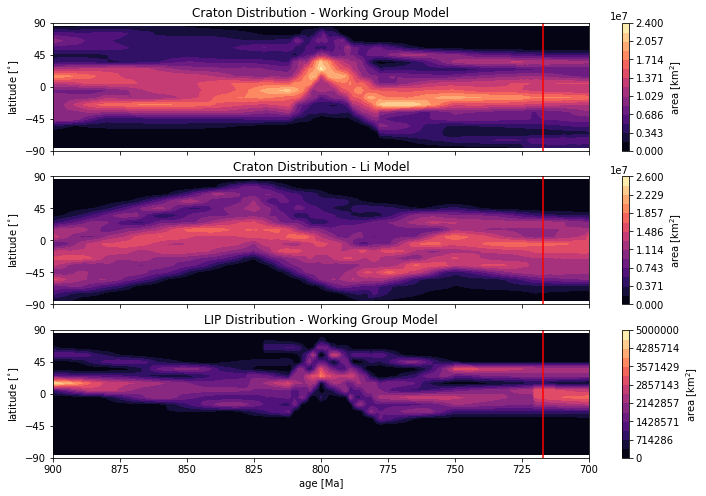

In [45]:
fig, axs = plt.subplots(3, 1, figsize=(12,8), sharex=True)

##### cratons - Working Group Model

# pull out just the values for plotting (i.e. no index or column headings)
just_values = calc_areas_cratons.as_matrix(columns=calc_areas_cratons.columns[3:])

# the number of levels
levels = np.linspace(0,math.ceil(np.max(just_values) / 1e6)*1e6,15)

# plot
cntrf = axs[0].contourf(ts, calc_areas_cratons['lat_mids'], just_values, cmap='magma', levels=levels)

# prettify
axs[0].set_ylabel('latitude [$^{\circ}$]')
axs[0].set_title('Craton Distribution - Working Group Model')
axs[0].set_yticks([-90,-45,0,45,90])
axs[0].axvline(717,color='r')

# the colorbar
cbar = fig.colorbar(cntrf, ax=axs[0])
cbar.ax.set_ylabel('area [km$^{2}$]')

##### cratons - Li Model

# pull out just the values for plotting (i.e. no index or column headings)
just_values = calc_areas_cratons_Li_high.as_matrix(columns=calc_areas_cratons_Li_high.columns[3:])

# the number of levels
levels = np.linspace(0,math.ceil(np.max(just_values) / 1e6)*1e6,15)

# plot
cntrf = axs[1].contourf(ts_Li, calc_areas_cratons_Li_high['lat_mids'], just_values, cmap='magma', levels=levels)

# prettify
axs[1].set_ylabel('latitude [$^{\circ}$]')
axs[1].set_title('Craton Distribution - Li Model')
axs[1].set_yticks([-90,-45,0,45,90])
axs[1].axvline(717,color='r')

# the colorbar
cbar = fig.colorbar(cntrf, ax=axs[1])
cbar.ax.set_ylabel('area [km$^{2}$]')

##### LIPs

# pull out just the values for plotting (i.e. no index or column headings)
just_values = calc_areas_LIPs.as_matrix(columns=calc_areas_LIPs.columns[3:Ts.shape[1]])

# the number of levels
levels = np.linspace(0,math.ceil(np.max(just_values) / 1e6)*1e6,15)

# plot
cntrf = axs[2].contourf(ts[:(Ts.shape[1]-3)], calc_areas_LIPs['lat_mids'],\
                        just_values, cmap='magma', levels=levels)

# prettify
axs[2].set_ylabel('latitude [$^{\circ}$]')
axs[2].set_title('LIP Distribution - Working Group Model')
axs[2].set_yticks([-90,-45,0,45,90])
axs[2].axvline(717,color='r')
axs[2].set_xlabel('age [Ma]')
axs[2].set_xlim(900,700)

# the colorbar
cbar = fig.colorbar(cntrf, ax=axs[2])
cbar.ax.set_ylabel('area [km$^{2}$]')

#plt.savefig('Save_Figures/zonal_distribution.svg')

plt.show(fig)

### The Absolute Zonal Craton and LIP Distribution Through Time

Calculate absolute latitudes and store in a new dataframe.

In [46]:
# initiate a new dataframe for absolute latitudes
num_bands = len(calc_areas_cratons.index)

calc_abs_areas_cratons = pd.DataFrame({'lat_maxs':calc_areas_cratons['lat_maxs'][(num_bands/2):],\
                                       'lat_mids':calc_areas_cratons['lat_mids'][(num_bands/2):],\
                                       'lat_mins':calc_areas_cratons['lat_mins'][(num_bands/2):]})
calc_abs_areas_cratons.reset_index(drop=True, inplace=True)

calc_abs_areas_cratons_Li_high = pd.DataFrame({'lat_maxs':calc_areas_cratons_Li_high['lat_maxs'][(num_bands/2):],\
                                               'lat_mids':calc_areas_cratons_Li_high['lat_mids'][(num_bands/2):],\
                                               'lat_mins':calc_areas_cratons_Li_high['lat_mins'][(num_bands/2):]})
calc_abs_areas_cratons_Li_high.reset_index(drop=True, inplace=True)

calc_abs_areas_cratons_Li_low = pd.DataFrame({'lat_maxs':calc_areas_cratons_Li_low['lat_maxs'][(num_bands/2):],\
                                              'lat_mids':calc_areas_cratons_Li_low['lat_mids'][(num_bands/2):],\
                                              'lat_mins':calc_areas_cratons_Li_low['lat_mins'][(num_bands/2):]})
calc_abs_areas_cratons_Li_low.reset_index(drop=True, inplace=True)

calc_abs_areas_LIPs = pd.DataFrame({'lat_maxs':calc_areas_LIPs['lat_maxs'][(num_bands/2):],\
                                    'lat_mids':calc_areas_LIPs['lat_mids'][(num_bands/2):],\
                                    'lat_mins':calc_areas_LIPs['lat_mins'][(num_bands/2):]})
calc_abs_areas_LIPs.reset_index(drop=True, inplace=True)

calc_abs_areas_LIPs_weath = pd.DataFrame({'lat_maxs':calc_areas_LIPs_weath['lat_maxs'][(num_bands/2):],\
                                          'lat_mids':calc_areas_LIPs_weath['lat_mids'][(num_bands/2):],\
                                          'lat_mins':calc_areas_LIPs_weath['lat_mins'][(num_bands/2):]})
calc_abs_areas_LIPs_weath.reset_index(drop=True, inplace=True)

calc_abs_areas_LIPs_thresh = pd.DataFrame({'lat_maxs':calc_areas_LIPs_thresh['lat_maxs'][(num_bands/2):],\
                                           'lat_mids':calc_areas_LIPs_thresh['lat_mids'][(num_bands/2):],\
                                           'lat_mins':calc_areas_LIPs_thresh['lat_mins'][(num_bands/2):]})
calc_abs_areas_LIPs_thresh.reset_index(drop=True, inplace=True)

calc_abs_areas_LIPs_decay = pd.DataFrame({'lat_maxs':calc_areas_LIPs_decay['lat_maxs'][(num_bands/2):],\
                                          'lat_mids':calc_areas_LIPs_decay['lat_mids'][(num_bands/2):],\
                                          'lat_mins':calc_areas_LIPs_decay['lat_mins'][(num_bands/2):]})
calc_abs_areas_LIPs_decay.reset_index(drop=True, inplace=True)

calc_abs_areas_LIPs_cover = pd.DataFrame({'lat_maxs':calc_areas_LIPs_cover['lat_maxs'][(num_bands/2):],\
                                          'lat_mids':calc_areas_LIPs_cover['lat_mids'][(num_bands/2):],\
                                          'lat_mins':calc_areas_LIPs_cover['lat_mins'][(num_bands/2):]})
calc_abs_areas_LIPs_cover.reset_index(drop=True, inplace=True)

# iterate over the time steps
for i in range(len(ts)):
    # iterate over the bands: sum then store
    for j in range(num_bands/2):
        abs_area = calc_areas_cratons['area_km2_'+str(ts[i])][j]+\
                   calc_areas_cratons['area_km2_'+str(ts[i])][(num_bands-1)-j]
        calc_abs_areas_cratons.loc[((num_bands/2)-1)-j,'area_km2_'+str(ts[i])]=abs_area
        
        abs_area = calc_areas_LIPs['area_km2_'+str(ts[i])][j]+\
                   calc_areas_LIPs['area_km2_'+str(ts[i])][(num_bands-1)-j]
        calc_abs_areas_LIPs.loc[((num_bands/2)-1)-j,'area_km2_'+str(ts[i])]=abs_area
        
        abs_area = calc_areas_LIPs_weath['area_km2_'+str(ts[i])][j]+\
                   calc_areas_LIPs_weath['area_km2_'+str(ts[i])][(num_bands-1)-j]
        calc_abs_areas_LIPs_weath.loc[((num_bands/2)-1)-j,'area_km2_'+str(ts[i])]=abs_area
        
        abs_area = calc_areas_LIPs_thresh['area_km2_'+str(ts[i])][j]+\
                   calc_areas_LIPs_thresh['area_km2_'+str(ts[i])][(num_bands-1)-j]
        calc_abs_areas_LIPs_thresh.loc[((num_bands/2)-1)-j,'area_km2_'+str(ts[i])]=abs_area
        
        abs_area = calc_areas_LIPs_decay['area_km2_'+str(ts[i])][j]+\
                   calc_areas_LIPs_decay['area_km2_'+str(ts[i])][(num_bands-1)-j]
        calc_abs_areas_LIPs_decay.loc[((num_bands/2)-1)-j,'area_km2_'+str(ts[i])]=abs_area
        
        abs_area = calc_areas_LIPs_cover['area_km2_'+str(ts[i])][j]+\
                   calc_areas_LIPs_cover['area_km2_'+str(ts[i])][(num_bands-1)-j]
        calc_abs_areas_LIPs_cover.loc[((num_bands/2)-1)-j,'area_km2_'+str(ts[i])]=abs_area
        
for i in range(len(ts_Li)):
    # iterate over the bands: sum then store
    for j in range(num_bands/2):
        abs_area = calc_areas_cratons_Li_high['area_km2_'+str(ts_Li[i])][j]+\
                   calc_areas_cratons_Li_high['area_km2_'+str(ts_Li[i])][(num_bands-1)-j]
        calc_abs_areas_cratons_Li_high.loc[((num_bands/2)-1)-j,'area_km2_'+str(ts_Li[i])]=abs_area
        
        abs_area = calc_areas_cratons_Li_low['area_km2_'+str(ts_Li[i])][j]+\
                   calc_areas_cratons_Li_low['area_km2_'+str(ts_Li[i])][(num_bands-1)-j]
        calc_abs_areas_cratons_Li_low.loc[((num_bands/2)-1)-j,'area_km2_'+str(ts_Li[i])]=abs_area

# save the result to a .csv
calc_abs_areas_cratons.to_csv('calc_abs_areas_cratons.csv', index=False)
calc_abs_areas_cratons_Li_high.to_csv('calc_abs_areas_cratons_Li_high.csv', index=False)
calc_abs_areas_cratons_Li_low.to_csv('calc_abs_areas_cratons_Li_low.csv', index=False)
calc_abs_areas_LIPs.to_csv('calc_abs_areas_LIPs.csv', index=False)
calc_abs_areas_LIPs_weath.to_csv('calc_abs_areas_LIPs_weath.csv', index=False)
calc_abs_areas_LIPs_thresh.to_csv('calc_abs_areas_LIPs_thresh.csv', index=False)
calc_abs_areas_LIPs_decay.to_csv('calc_abs_areas_LIPs_decay.csv', index=False)
calc_abs_areas_LIPs_cover.to_csv('calc_abs_areas_LIPs_cover.csv', index=False)

Plot - note that the colorbar is not the same as the figure above.

/Users/yuempark/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Users/yuempark/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:27: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Users/yuempark/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:48: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Users/yuempark/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:69: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


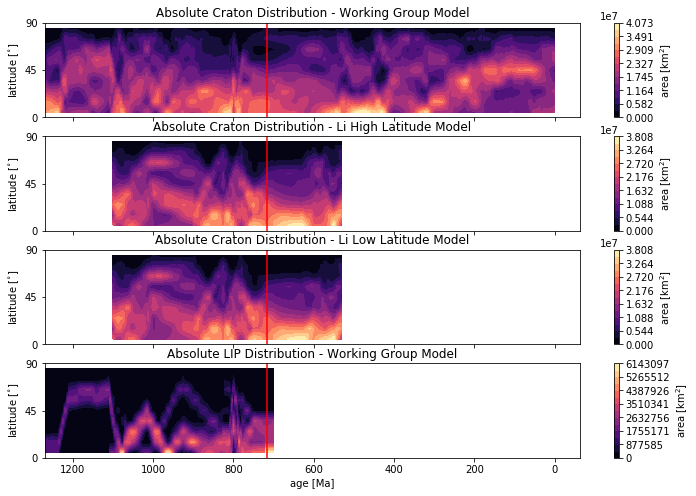

In [47]:
fig, axs = plt.subplots(4, 1, figsize=(12,8), sharex=True)

##### cratons - Working Group Model

# pull out just the values for plotting (i.e. no index or column headings)
just_values = calc_abs_areas_cratons.as_matrix(columns=calc_abs_areas_cratons.columns[3:])

# the number of levels
levels = np.linspace(np.min(just_values),np.max(just_values),15)

# plot
cntrf = axs[0].contourf(ts, calc_abs_areas_cratons['lat_mids'], just_values, cmap='magma', levels=levels)

# prettify
axs[0].set_ylabel('latitude [$^{\circ}$]')
axs[0].set_title('Absolute Craton Distribution - Working Group Model')
axs[0].set_yticks([0,45,90])
axs[0].axvline(717,color='r')

# the colorbar
cbar = fig.colorbar(cntrf, ax=axs[0])
cbar.ax.set_ylabel('area [km$^{2}$]')

##### cratons - Li High Lat. Model

# pull out just the values for plotting (i.e. no index or column headings)
just_values = calc_abs_areas_cratons_Li_high.as_matrix(columns=calc_abs_areas_cratons_Li_high.columns[3:])

# the number of levels
levels = np.linspace(np.min(just_values),np.max(just_values),15)

# plot
cntrf = axs[1].contourf(ts_Li, calc_abs_areas_cratons_Li_high['lat_mids'], just_values, cmap='magma', levels=levels)

# prettify
axs[1].set_ylabel('latitude [$^{\circ}$]')
axs[1].set_title('Absolute Craton Distribution - Li High Latitude Model')
axs[1].set_yticks([0,45,90])
axs[1].axvline(717,color='r')

# the colorbar
cbar = fig.colorbar(cntrf, ax=axs[1])
cbar.ax.set_ylabel('area [km$^{2}$]')

##### cratons - Li Low Lat. Model

# pull out just the values for plotting (i.e. no index or column headings)
just_values = calc_abs_areas_cratons_Li_low.as_matrix(columns=calc_abs_areas_cratons_Li_low.columns[3:])

# the number of levels
levels = np.linspace(np.min(just_values),np.max(just_values),15)

# plot
cntrf = axs[2].contourf(ts_Li, calc_abs_areas_cratons_Li_low['lat_mids'], just_values, cmap='magma', levels=levels)

# prettify
axs[2].set_ylabel('latitude [$^{\circ}$]')
axs[2].set_title('Absolute Craton Distribution - Li Low Latitude Model')
axs[2].set_yticks([0,45,90])
axs[2].axvline(717,color='r')

# the colorbar
cbar = fig.colorbar(cntrf, ax=axs[2])
cbar.ax.set_ylabel('area [km$^{2}$]')

##### LIPs

# pull out just the values for plotting (i.e. no index or column headings)
just_values = calc_abs_areas_LIPs.as_matrix(columns=calc_abs_areas_LIPs.columns[3:Ts.shape[1]])

# the number of levels
levels = np.linspace(np.min(just_values),np.max(just_values),15)

# plot
cntrf = axs[3].contourf(ts[:(Ts.shape[1]-3)], calc_abs_areas_LIPs['lat_mids'],\
                        just_values, cmap='magma', levels=levels)

# prettify
axs[3].set_ylabel('latitude [$^{\circ}$]')
axs[3].set_title('Absolute LIP Distribution - Working Group Model')
axs[3].set_yticks([0,45,90])
axs[3].axvline(717,color='r')
axs[3].set_xlabel('age [Ma]')
axs[3].invert_xaxis()

# the colorbar
cbar = fig.colorbar(cntrf, ax=axs[3])
cbar.ax.set_ylabel('area [km$^{2}$]')

plt.show(fig)

A 900-700 Ma version:

/Users/yuempark/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Users/yuempark/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:27: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


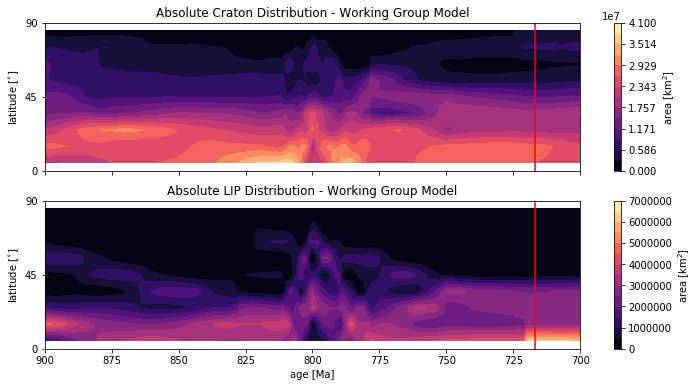

In [48]:
fig, axs = plt.subplots(2, 1, figsize=(12,6), sharex=True)

##### cratons - Working Group Model

# pull out just the values for plotting (i.e. no index or column headings)
just_values = calc_abs_areas_cratons.as_matrix(columns=calc_abs_areas_cratons.columns[3:])

# the number of levels
levels = np.linspace(0,math.ceil(np.max(just_values) / 1e6)*1e6,15)

# plot
cntrf = axs[0].contourf(ts, calc_abs_areas_cratons['lat_mids'], just_values, cmap='magma', levels=levels)

# prettify
axs[0].set_ylabel('latitude [$^{\circ}$]')
axs[0].set_title('Absolute Craton Distribution - Working Group Model')
axs[0].set_yticks([0,45,90])
axs[0].axvline(717,color='r')

# the colorbar
cbar = fig.colorbar(cntrf, ax=axs[0])
cbar.ax.set_ylabel('area [km$^{2}$]')

##### LIPs

# pull out just the values for plotting (i.e. no index or column headings)
just_values = calc_abs_areas_LIPs.as_matrix(columns=calc_abs_areas_LIPs.columns[3:Ts.shape[1]])

# the number of levels
levels = np.linspace(0,math.ceil(np.max(just_values) / 1e6)*1e6,15)

# plot
cntrf = axs[1].contourf(ts[:(Ts.shape[1]-3)], calc_abs_areas_LIPs['lat_mids'],\
                        just_values, cmap='magma', levels=levels)

# prettify
axs[1].set_ylabel('latitude [$^{\circ}$]')
axs[1].set_title('Absolute LIP Distribution - Working Group Model')
axs[1].set_yticks([0,45,90])
axs[1].axvline(717,color='r')
axs[1].set_xlabel('age [Ma]')
axs[1].set_xlim(900,700)

# the colorbar
cbar = fig.colorbar(cntrf, ax=axs[1])
cbar.ax.set_ylabel('area [km$^{2}$]')

#plt.savefig('Save_Figures/absolute_zonal_distribution.svg')

plt.show(fig)

### The Craton Area in the Tropics ($\leq$10$^{\circ}$)

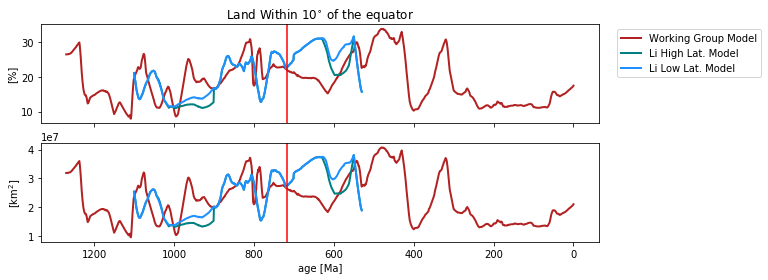

In [49]:
# define the tropics latitude
tropics_lat = 10

# initialize storage arrays
percs = np.array([])
percs_Li_high = np.array([])
percs_Li_low = np.array([])

absolute = np.array([])
absolute_Li_high = np.array([])
absolute_Li_low = np.array([])

# iterate through the time steps - Working Group Model
for i in range(len(ts)):
    
    # sum the total land area at the time
    area_sum = sum(calc_abs_areas_cratons['area_km2_'+str(ts[i])])
    
    # get the area in the tropics
    area_tropics = 0
    for j in range(len(calc_abs_areas_cratons.index)):
        if calc_abs_areas_cratons['lat_mids'][j] <= tropics_lat:
            area_tropics = area_tropics + calc_abs_areas_cratons['area_km2_'+str(ts[i])][j]
    
    # convert to percentage and store
    perc_tropics = (area_tropics / area_sum) * 100
    percs = np.append(percs, perc_tropics)
    absolute = np.append(absolute, area_tropics)

# iterate through the time steps - Li High Lat. Model
for i in range(len(ts_Li)):
    # sum the total land area at the time
    area_sum = sum(calc_abs_areas_cratons_Li_high['area_km2_'+str(ts_Li[i])])
    
    # get the area in the tropics
    area_tropics = 0
    for j in range(len(calc_abs_areas_cratons_Li_high.index)):
        if calc_abs_areas_cratons_Li_high['lat_mids'][j] <= tropics_lat:
            area_tropics = area_tropics + calc_abs_areas_cratons_Li_high['area_km2_'+str(ts_Li[i])][j]
    
    # convert to percentage and store
    perc_tropics = (area_tropics / area_sum) * 100
    percs_Li_high = np.append(percs_Li_high, perc_tropics)
    absolute_Li_high = np.append(absolute_Li_high, area_tropics)
    
# iterate through the time steps - Li Low Lat. Model
for i in range(len(ts_Li)):
    # sum the total land area at the time
    area_sum = sum(calc_abs_areas_cratons_Li_low['area_km2_'+str(ts_Li[i])])
    
    # get the area in the tropics
    area_tropics = 0
    for j in range(len(calc_abs_areas_cratons_Li_low.index)):
        if calc_abs_areas_cratons_Li_low['lat_mids'][j] <= tropics_lat:
            area_tropics = area_tropics + calc_abs_areas_cratons_Li_low['area_km2_'+str(ts_Li[i])][j]
    
    # convert to percentage and store
    perc_tropics = (area_tropics / area_sum) * 100
    percs_Li_low = np.append(percs_Li_low, perc_tropics)
    absolute_Li_low = np.append(absolute_Li_low, area_tropics)
    
# plot
fig, axs = plt.subplots(2, 1, figsize=(10,4), sharex=True)
axs[0].plot(ts, percs, linewidth=2, c='firebrick', label='Working Group Model')
axs[0].plot(ts_Li, percs_Li_high, linewidth=2, c='teal', label='Li High Lat. Model')
axs[0].plot(ts_Li, percs_Li_low, linewidth=2, c='dodgerblue', label='Li Low Lat. Model')
axs[0].legend(bbox_to_anchor=(1.3, 1))
axs[0].set_ylabel('[%]')
axs[0].axvline(717,color='r')
axs[0].set_title('Land Within ' + str(tropics_lat) + '$^{\circ}$ of the equator')

axs[1].plot(ts, absolute, linewidth=2, c='firebrick', label='Working Group Model')
axs[1].plot(ts_Li, absolute_Li_high, linewidth=2, c='teal', label='Li High Lat. Model')
axs[1].plot(ts_Li, absolute_Li_low, linewidth=2, c='dodgerblue', label='Li Low Lat. Model')
axs[1].set_xlabel('age [Ma]')
axs[1].set_ylabel('[km$^{2}$]')
axs[1].invert_xaxis()
axs[1].axvline(717,color='r')

plt.show(fig)

A 900-700 Ma version:

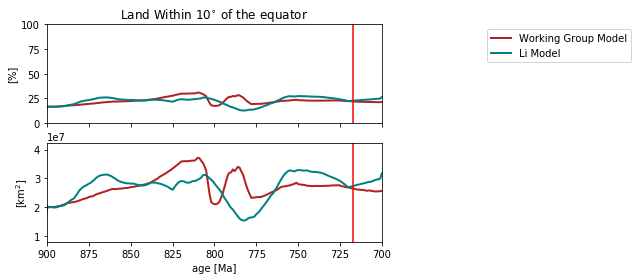

In [50]:
fig, axs = plt.subplots(2, 1, figsize=(6,4), sharex=True)
axs[0].plot(ts, percs, linewidth=2, c='firebrick', label='Working Group Model')
axs[0].plot(ts_Li, percs_Li_high, linewidth=2, c='teal', label='Li Model')
axs[0].legend(bbox_to_anchor=(1.3, 1))
axs[0].set_ylabel('[%]')
axs[0].axvline(717,color='r')
axs[0].set_ylim(0,100)
axs[0].set_title('Land Within ' + str(tropics_lat) + '$^{\circ}$ of the equator')

axs[1].plot(ts, absolute, linewidth=2, c='firebrick', label='Working Group Model')
axs[1].plot(ts_Li, absolute_Li_high, linewidth=2, c='teal', label='Li Model')
axs[1].set_xlabel('age [Ma]')
axs[1].set_ylabel('[km$^{2}$]')
axs[1].set_xlim(900,700)
axs[1].axvline(717,color='r')

plt.show(fig)

### The LIP Area in the Tropics ($\leq$10$^{\circ}$)

Calculate the area and store in a numpy array.

In [51]:
# initialize storage array
area_tropics_array = np.array([])
perc_area_tropics_array = np.array([])

# iterate through the time steps
for i in range(len(ts)):
    
    # get the area in the tropics
    area_tropics = 0
    for j in range(len(calc_abs_areas_LIPs.index)):
        if calc_abs_areas_cratons['lat_mids'][j] <= tropics_lat:
            area_tropics = area_tropics + calc_abs_areas_LIPs['area_km2_'+str(ts[i])][j]
            
    # get the total area
    area_sum = sum(calc_abs_areas_LIPs['area_km2_'+str(ts[i])])
    
    # store
    area_tropics_array = np.append(area_tropics_array, area_tropics)
    perc_area_tropics_array = np.append(perc_area_tropics_array, (area_tropics/area_sum)*100)

/Users/yuempark/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars


Plot.

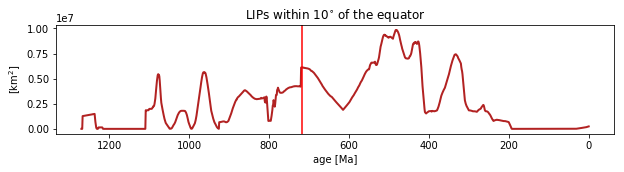

In [52]:
fig, ax = plt.subplots(sharex=True,figsize=(10,2))
ax.plot(ts, area_tropics_array, c='firebrick', linewidth=2)

# prettify
ax.set_xlabel('age [Ma]')
ax.set_ylabel('[km$^{2}$]')
ax.set_title('LIPs within ' + str(tropics_lat) + '$^{\circ}$ of the equator')
ax.invert_xaxis()
ax.axvline(717,color='r')

plt.show(fig)

A 900-700 Ma version:

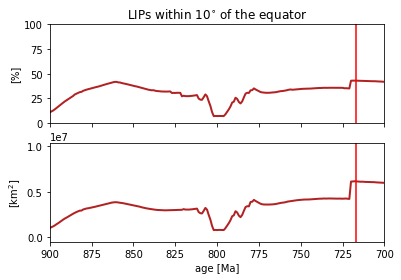

In [53]:
fig, ax = plt.subplots(2,1,sharex=True,figsize=(6,4))
ax[0].plot(ts, perc_area_tropics_array, c='firebrick', linewidth=2)
ax[1].plot(ts, area_tropics_array, c='firebrick', linewidth=2)

# prettify
ax[0].set_title('LIPs within ' + str(tropics_lat) + '$^{\circ}$ of the equator')
ax[0].set_ylabel('[%]')
ax[0].set_ylim(0,100)
ax[0].axvline(717,color='r')

ax[1].set_ylabel('[km$^{2}$]')
ax[1].set_xlabel('age [Ma]')
ax[1].set_xlim(900,700)
ax[1].axvline(717,color='r')

plt.show(fig)

### The Craton/LIP Area Ratio in the Tropics ($\leq$10$^{\circ}$)

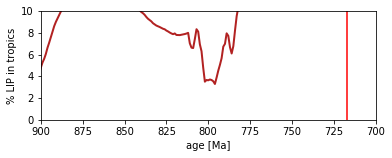

In [54]:
# calculate
LIP_craton_tropics_ratio = (area_tropics_array/(absolute + area_tropics_array))*100

fig, ax = plt.subplots(figsize=(6,2))
ax.plot(ts,LIP_craton_tropics_ratio, c='firebrick', lw=2)
ax.axvline(717,color='r')
ax.set_ylabel('% LIP in tropics')
ax.set_xlabel('age [Ma]')
ax.set_ylim(0,10)
ax.set_xlim(900,700)
plt.show(fig)

### The Tropics Summary Plots

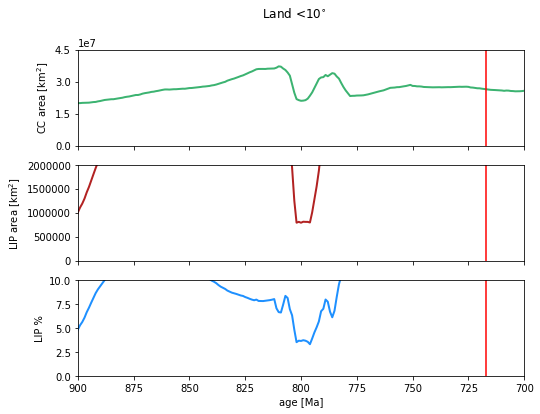

In [55]:
fig, ax = plt.subplots(3,1, sharex=True, figsize=(8,6))
fig.suptitle('Land <' + str(tropics_lat) + '$^{\circ}$')

ax[0].plot(ts, absolute, c='mediumseagreen', lw=2, label='Working Group Model')
ax[0].axvline(717,color='r')
ax[0].set_ylabel('CC area [km$^{2}$]')
ax[0].yaxis.set_ticks(np.arange(0,6.0e7,1.5e7))

ax[1].plot(ts, area_tropics_array, c='firebrick', lw=2, label='LIP')
ax[1].set_ylabel('LIP area [km$^{2}$]')
ax[1].set_ylim(0,2e6)
ax[1].axvline(717,color='r')

ax[2].plot(ts,LIP_craton_tropics_ratio, lw=2, c='dodgerblue')
ax[2].set_ylim(0,10)
ax[2].set_ylabel('LIP %')
ax[2].set_xlim(900,700)
ax[2].set_xlabel('age [Ma]')
ax[2].axvline(717,color='r')

#plt.savefig('Save_Figures/tropics_areas.svg')

plt.show(fig)

#### Plotting Forcings Used in Seawater Model v2b

In [56]:
# the index for 900 Ma
ts[370]

900

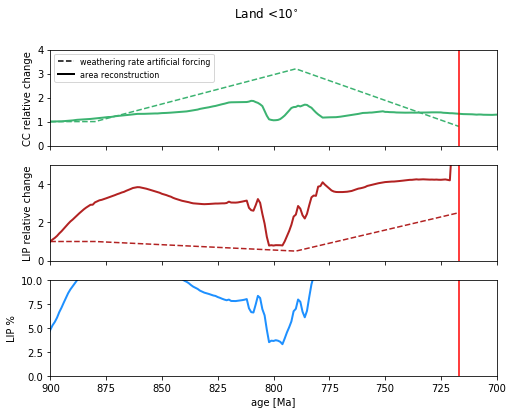

In [57]:
fig, ax = plt.subplots(3,1, sharex=True, figsize=(8,6))
fig.suptitle('Land <' + str(tropics_lat) + '$^{\circ}$')

ax[0].plot([900,880,790,717],np.array([7500.0,7500.0,24000.0,6000.0])/7500.0,\
           '--',c='mediumseagreen', label='_nolegend')
ax[0].plot(ts, absolute/absolute[370], c='mediumseagreen', lw=2, label='_nolegend')
ax[0].plot(0,0,'--',c='k',label='weathering rate artificial forcing')
ax[0].plot(0,0,c='k',lw=2,label='area reconstruction')
ax[0].legend(loc=0, fontsize=8)
ax[0].axvline(717,color='r')
ax[0].set_ylim(0,4)
ax[0].set_ylabel('CC relative change')

ax[1].plot([900,880,790,717],np.array([1e6,1e6,0.5e6,2.5e6])/1e6,'--',c='firebrick')
ax[1].plot(ts, area_tropics_array/area_tropics_array[370], c='firebrick', lw=2, label='LIP')
ax[1].set_ylabel('LIP relative change')
ax[1].set_ylim(0,5)
ax[1].axvline(717,color='r')

ax[2].plot(ts,LIP_craton_tropics_ratio, lw=2, c='dodgerblue')
ax[2].set_ylim(0,10)
ax[2].set_ylabel('LIP %')
ax[2].set_xlim(900,700)
ax[2].set_xlabel('age [Ma]')
ax[2].axvline(717,color='r')

#plt.savefig('Save_Figures/tropics_areas_relative.svg')

plt.show(fig)

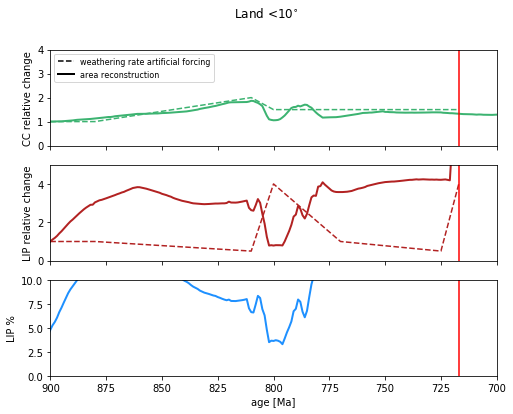

In [58]:
fig, ax = plt.subplots(3,1, sharex=True, figsize=(8,6))
fig.suptitle('Land <' + str(tropics_lat) + '$^{\circ}$')

ax[0].plot([900,880,810,800,770,725,717],np.array([7500.0,7500.0,15000.0,11250.0,11250.0,11250.0,11250.0])/7500.0,\
           '--',c='mediumseagreen', label='_nolegend')
ax[0].plot(ts, absolute/absolute[370], c='mediumseagreen', lw=2, label='_nolegend')
ax[0].plot(0,0,'--',c='k',label='weathering rate artificial forcing')
ax[0].plot(0,0,c='k',lw=2,label='area reconstruction')
ax[0].legend(loc=0, fontsize=8)
ax[0].axvline(717,color='r')
ax[0].set_ylim(0,4)
ax[0].set_ylabel('CC relative change')

ax[1].plot([900,880,810,800,770,725,717],np.array([1e6,1e6,0.5e6,4e6,1e6,0.5e6,4e6])/1e6,'--',c='firebrick')
ax[1].plot(ts, area_tropics_array/area_tropics_array[370], c='firebrick', lw=2, label='LIP')
ax[1].set_ylabel('LIP relative change')
ax[1].set_ylim(0,5)
ax[1].axvline(717,color='r')

ax[2].plot(ts,LIP_craton_tropics_ratio, lw=2, c='dodgerblue')
ax[2].set_ylim(0,10)
ax[2].set_ylabel('LIP %')
ax[2].set_xlim(900,700)
ax[2].set_xlabel('age [Ma]')
ax[2].axvline(717,color='r')

#plt.savefig('Save_Figures/tropics_areas_relative_b.svg')

plt.show(fig)